# **My first deep learning experience using google collabotary and Keras **

In this blog, I will present how to implement a deep learning network. For that, we need a dataset which I have saved in a google sheet file. In order to access the dataset, we need to read data from the file. For that, we have to use google collabotary APIs and google spread API also known as *gspread*. The *gspread* can be installed by executing the following command:

In [0]:
!pip install --upgrade -q gspread

After that, we need to access the API from collabotary for the authentication. The following code and the module are used for authentication

```
from google.colab import auth
auth.authenticate_user()
```
 After the authentication user can use the dataset. However, the data is in google spread file. It needs to be converted to numpy objects. I will discuss about it, but before that let us discuss a bit about the dataset. 
 
**Information on Dataset**

The dataset is about diabetese, and it is known as *Pima Indians Diabetes Database*. It can be downloaded from the following website:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

The dataset has 8 attributes which are listed as follows:

1.   Number of times pregnant
2.   Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.   Diastolic blood pressure (mm Hg)
4.   Triceps skin fold thickness (mm)
5.   2-Hour serum insulin (mu U/ml)
6.   Body mass index (weight in kg/(height in m)^2)
7.   Diabetes pedigree function
8.   Age (years)

Similarly, there is only 1 class variable (0 or 1) which indicates whether a patient is having diabetese or not. There are 268 cases of 1 and 500 cases of 0. Details on the dataset can be found here:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

After authentication, to access the data gspread is used because the dataset is stored in google sheet file. 
The file name in this example is *pima-indians-diabetes*. To access the file first we have to Authenticate, which can be done by executing the following code:


```
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('pima-indians-diabetes').sheet1
```
The API worksheet returns worksheet whose data should be obtained as list of python. Which can be done by the following command:

```
rows = worksheet.get_all_values()
```
In order to apply deep learning using Keras API, one need to represent the data variable *rows* in the numpy array object. To convert into numpy array the following command can be applied:

```
import pandas as pd
dataset =pd.DataFrame.from_records(rows)
#Converting to numpy arrays for X and Y
X=dataset.values[:,0:8] 
Y= dataset.values[:,8]
```
This code first convert *rows* to Dataframe object, then numpy arrays X and Y. After this to build a deeplearning model, we use the sequential and Dense API from keras, which are initialized as follows

```
from keras.models import Sequential
from keras.layers import Dense
```
The model is initialized in the following code. The model has two hidden layers. There are 12 outputs in the first layer, and 8 outputs in the second layer. The activation function for this model is 'relu' in the 1st and 2nd hidder layers, whereas sigmoid in the last hidden layer

```
#Initializing Keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

```

After the initialization, the following code is applied to compile the model.

```
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

```
Finally, the fitting or learning of the model is done via the following code
```
# Fit the model
history=model.fit(X, Y, epochs=500, batch_size=10,verbose=0)
```
It should be noted that the returned value of the API *model.fit()* consists of the information during the training of the model. Let us now print the accuracy vs epoch by executing the following code.

```
import matplotlib.pyplot as plt #for the plot
import numpy as np #for the scaler multiplications
plt.plot(np.multiply(history.history['acc'],100))
plt.ylabel('Accuracy % ')
plt.xlabel('epoch')
plt.show()
```
All the implementation is presented in the following code.

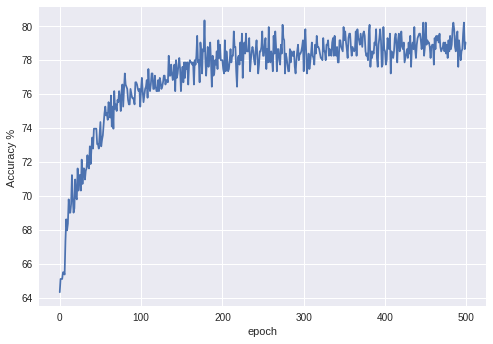

768/768 [==============================] - 0s 255us/step
[0.41695275468130905, 0.7994791666666666]


In [9]:

#This code is from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

from google.colab import auth
auth.authenticate_user()


import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('pima-indians-diabetes').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()



# Convert to a DataFrame and render.
import pandas as pd
dataset =pd.DataFrame.from_records(rows)
#Converting to numpy arrays for X and Y
X=dataset.values[:,0:8] 
Y= dataset.values[:,8]

#Keras initialization
from keras.models import Sequential
from keras.layers import Dense

#Initializing Keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(8, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='random_uniform'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.save_weights('model.h5')
# Fit the model
history=model.fit(X, Y, epochs=500, batch_size=10,verbose=0)

#plot the history
import matplotlib.pyplot as plt #for the plot
import numpy as np #for the scaler multiplications
plt.plot(np.multiply(history.history['acc'],100))
plt.ylabel('Accuracy % ')
plt.xlabel('epoch')
plt.show()
# evaluate the model
#print(history.history['loss'])
scores = model.evaluate(X, Y)

print(scores)

# **Training a new model**

Now let us train a new model for the dataset. The model considered has 8 outputs in the first layer and 12 in the second layer. Code below trains the model and compares with the previous model in terms of training accuracy.

500


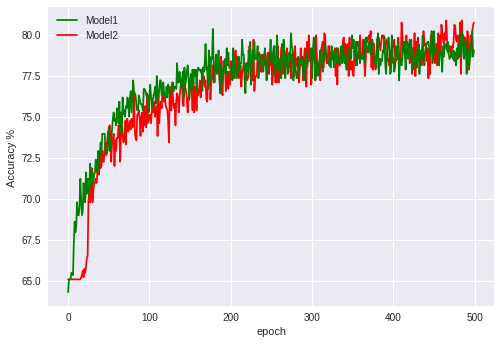

768/768 [==============================] - 0s 105us/step


In [12]:
model2 = Sequential()
model2.add(Dense(8, input_dim=8, activation='relu'))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.save_weights('model2.h5')
# Fit the model
history2=model.fit(X, Y, epochs=500, batch_size=10,verbose=0)

#plot the history and compare with history 1
n = np.arange(500)
print(len(history2.history['acc']))
line_down,=plt.plot(n,np.multiply(history2.history['acc'],100),'r',label='Model2')
line_up,=plt.plot(n,np.multiply(history.history['acc'],100),'g', label='Model1')
plt.legend(handles=[line_up,line_down])
plt.ylabel('Accuracy % ')
plt.xlabel('epoch')
plt.show()

# evaluate the model
#print(history.history['loss'])
scores = model.evaluate(X, Y)



# Comparison of the models
Now let us do a Monte-carlo experiment to test these models. Both of them are trained and tested 10 times. After that, a bar-graph is generated with standard deviations.

768/768 [==============================] - 0s 122us/step


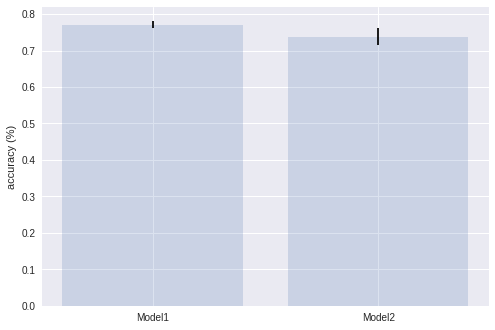

In [18]:
model1Scores =[];
model2Scores =[];

#training and running for 20 times
for i in range(1,20):
  model.load_weights('model.h5')#To reinitialize model
  model.fit(X, Y, epochs=100, batch_size=10,verbose=0,shuffle= True)
  tempScore = model.evaluate(X,Y)
  model1Scores.append(tempScore[1])
  
  model2.load_weights('model2.h5')#reinitialize model
  model2.fit(X, Y, epochs=50, batch_size=10,verbose=0,shuffle= True)
  tempScore = model2.evaluate(X,Y)
  model2Scores.append(tempScore[1])
  
#plotting bargraph with standard deviation
models = ['Model1','Model2']
x_pos = np.arange(len(models))
meansAcc = [np.mean(model1Scores),np.mean(model2Scores)]
stdAcc = [np.std(model1Scores),np.std(model2Scores)]
fig, ax = plt.subplots()
ax.bar(x_pos, meansAcc, yerr=stdAcc, align='center', alpha=0.2, ecolor='black', capsize=10)
ax.set_ylabel('accuracy (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
plt.show()

Comparison of the model with standard deviation shows that the accuracy of model 1 is better than model 2. Similarly standard deviation of the the model is also less compare to model 2. 